In [19]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [23]:
def gather_tokens(hidden_states,k):
    tracking_idx = []
    for layer in hidden_states.keys():
        log_softmax = F.softmax(hidden_states[layer],dim=-1)[0,0,:]
        predictions, candidates_idx = torch.sort(log_softmax, descending=True)
        tracking_idx += (candidates_idx[:k]).tolist()
    return set(tracking_idx)


In [ ]:
def evaluation(tokenizer,record,tracking_idx):
    hidden_states = record['hidden_states']
    for layer in hidden_states.keys():
        log_softmax = F.softmax(hidden_states[layer],dim=-1)[0,0,:]
        predictions = log_softmax[tracking_idx].tolist()
        candidates_token = [tokenizer.decode(idx) for idx in tracking_idx]
        plt.figure(figsize=[20,2])
        plt.title(f"layer: {layer}")
        plt.bar(candidates_token,predictions)

In [21]:
if __name__=='__main__':
    tokenizer = AutoTokenizer.from_pretrained("../llama-2-7b-hf/")
    record = torch.load("./test")
    gen_sequence = record['model_compeletion']
    compeletion = [tokenizer.decode(token) for token in gen_sequence]
    record.pop('model_compeletion')
    diff_mark = [idx for idx in record.keys()]
    for idx, token in enumerate(compeletion):
        if idx in diff_mark:
            print(f"\033[31m{token}\033[0m",end=' ')
            print(f"(\033[34m{record[idx]['origin']}\033[0m)",end=' ')
        else:
            print(token,end=' ')

Jan et ' (starts) s du cks lay (laid)  1 6 eggs per day . She (Every) e ats  3 for breakfast every day . She (That) b (makes) akes (aked) m uff ins for (using) her friends every (using) day with (using)  4 . She s ells the remainder (rest) at the far mers (mer) ' market daily for $ 2 per fresh du ck egg . So (Let)  (if) 1 6 -  (() 3 -  4 =  9 eggs are (remain) sold at the far mers (mer) ' market .  9 *  2 =  1 8 dollars . The answer is  1 8 . 
 (</s>) 
 (</s>) Q (##) : 

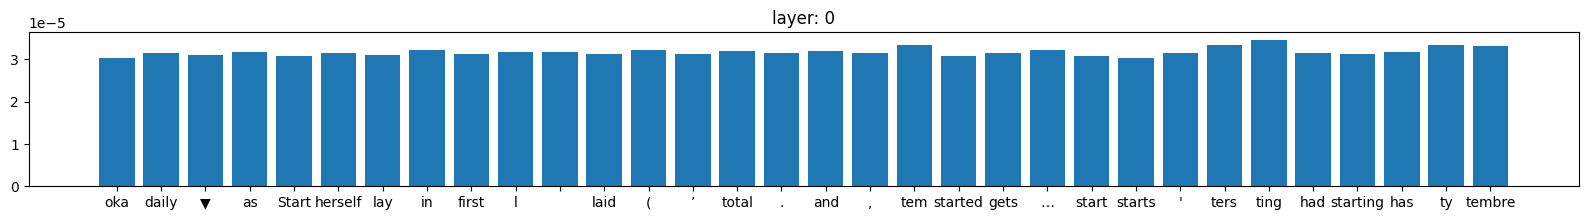

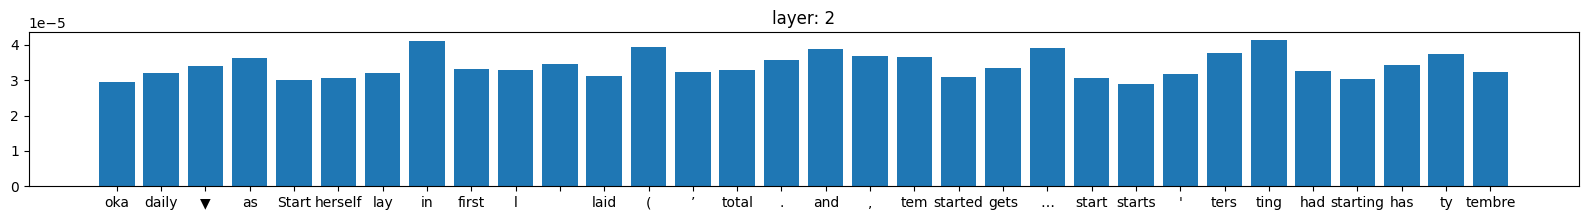

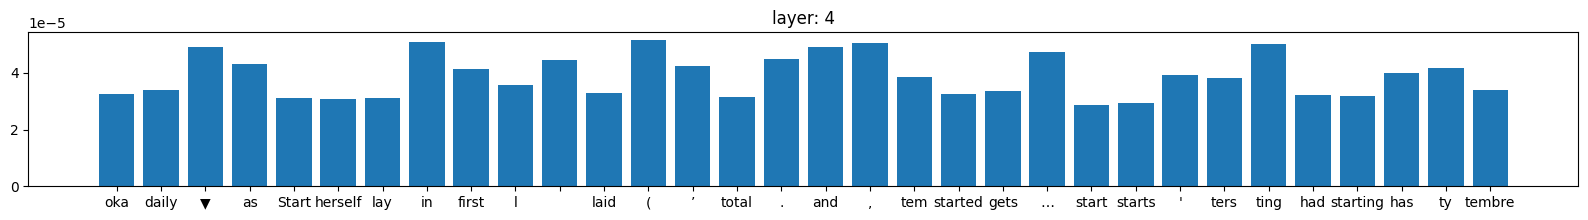

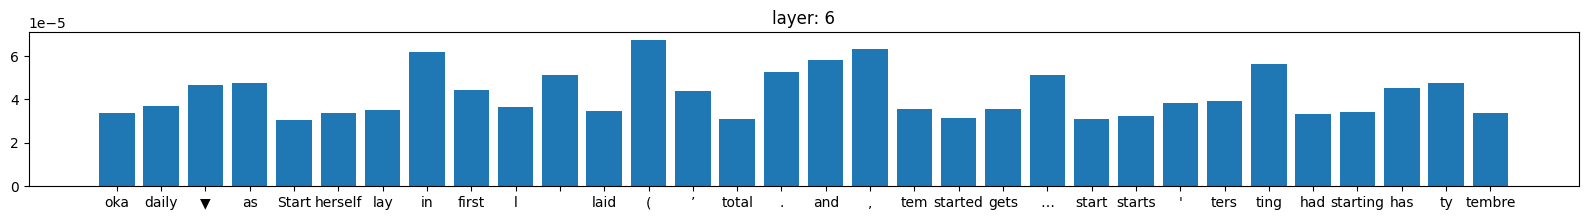

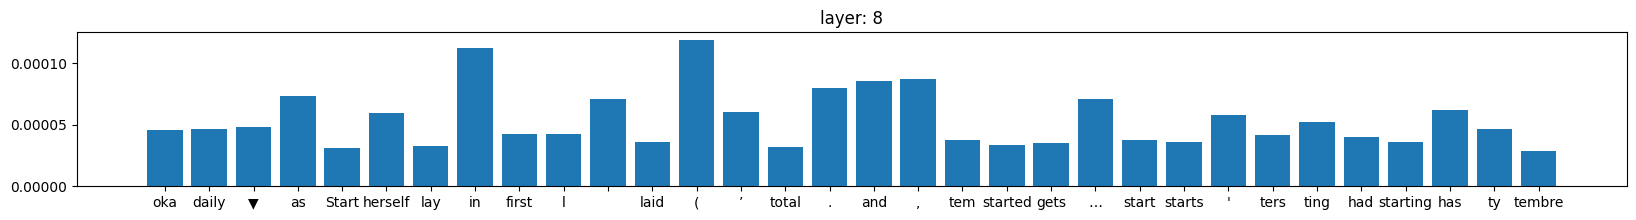

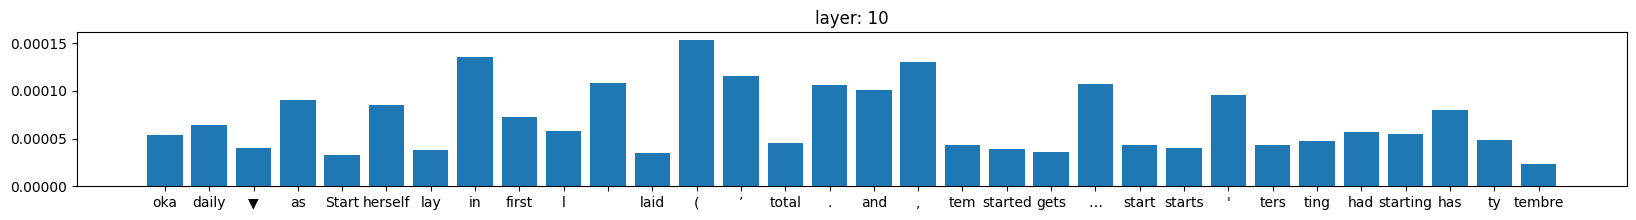

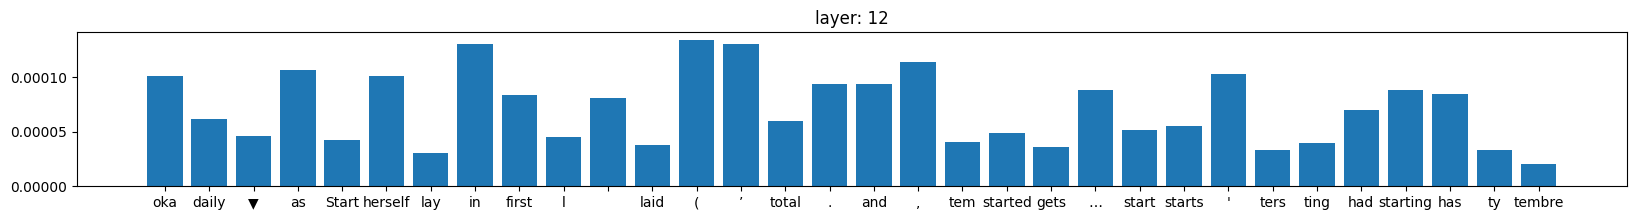

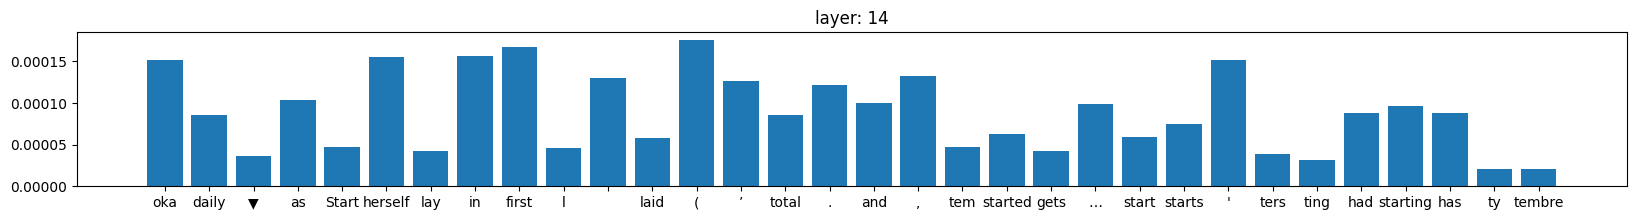

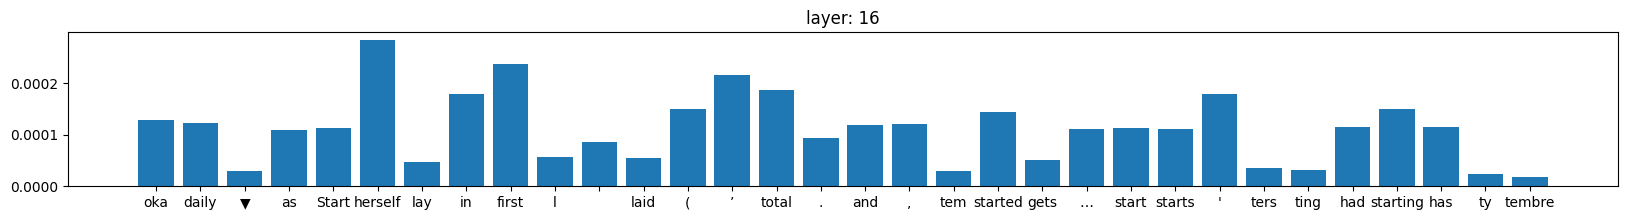

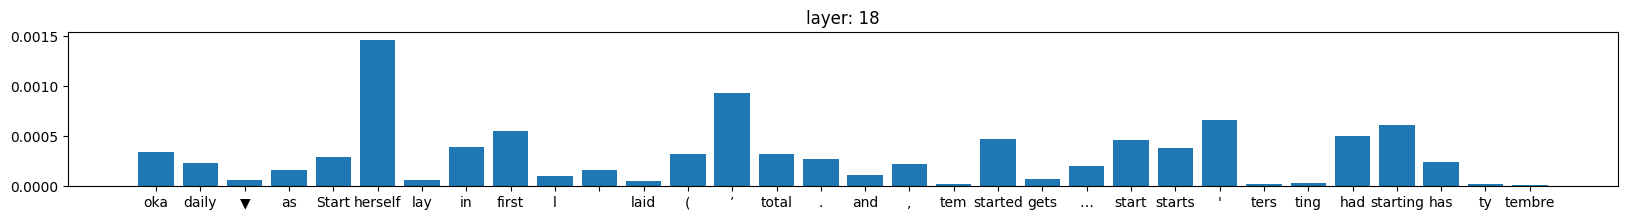

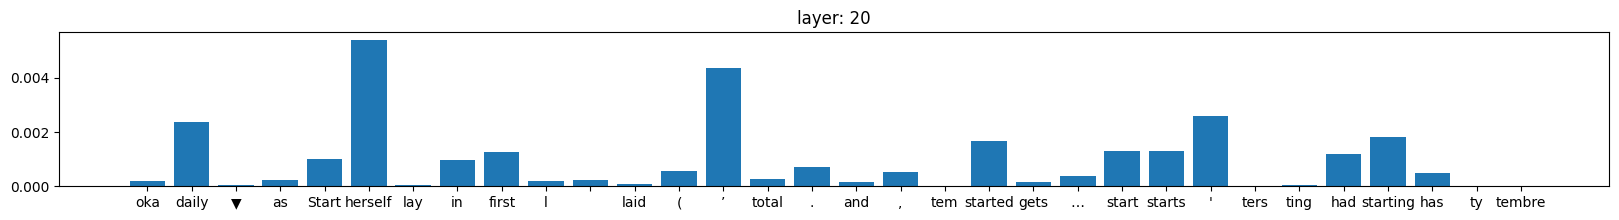

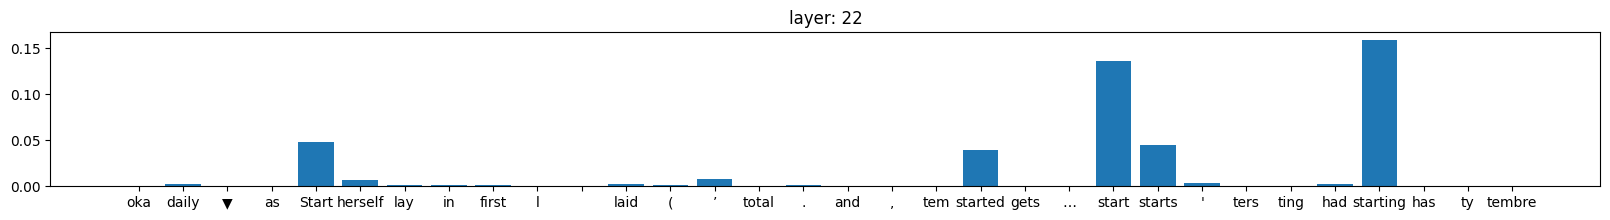

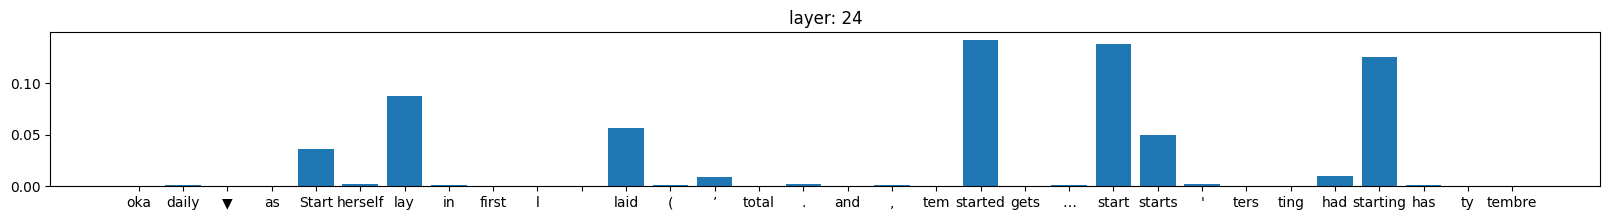

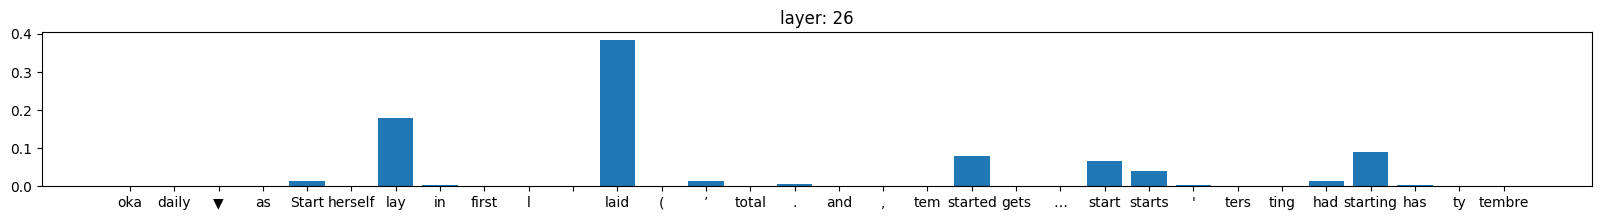

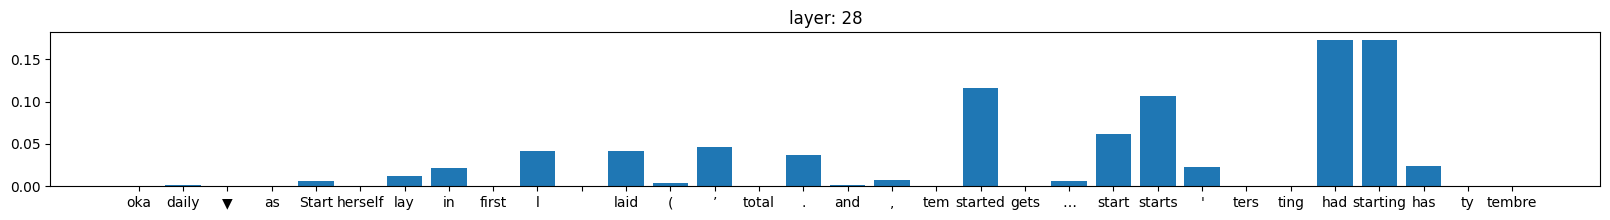

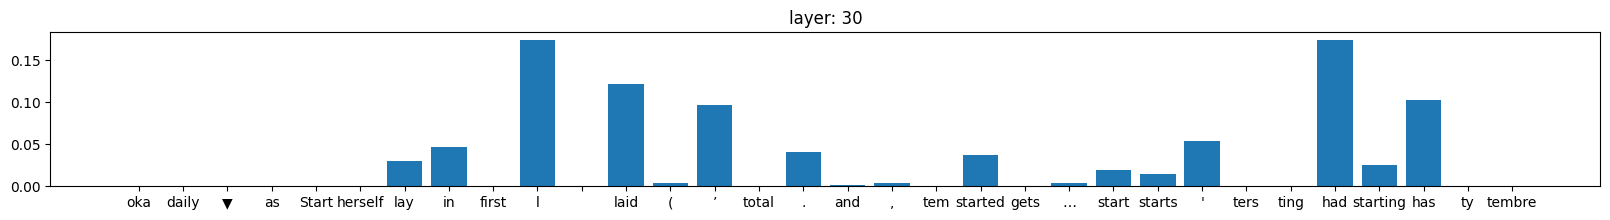

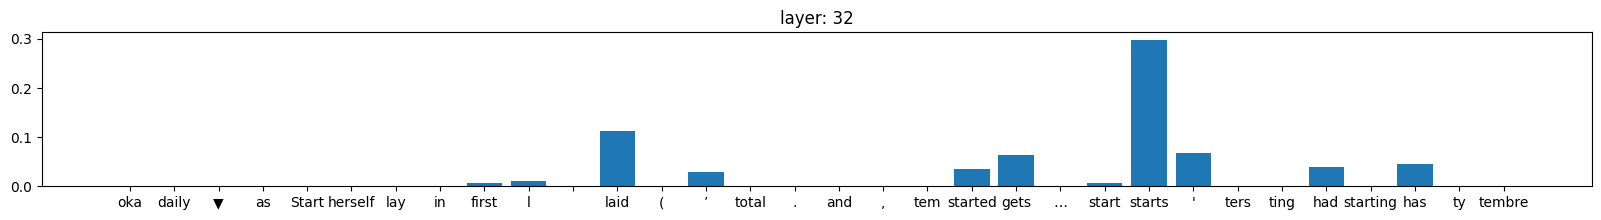

In [37]:

k = 5
diff_token = record[2]
tracking_idx = list(gather_tokens(diff_token['hidden_states'],k))
evaluation(tokenizer,diff_token,tracking_idx)